<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Redes Neuronales Convolucionales </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> , <a href="colectivafemcen@gmail.com "> ✉ Colectiva FEMCEN </a><br>

Versión actualizada: 05-04-2022
</div>

<br>

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# La llamada red neuronal

In [2]:
mnist = pd.read_csv("/content/sample_data/mnist_train_small.csv", names =['digit']+list(range(28*28)))
y = mnist.loc[:,'digit']
X = mnist.drop(columns='digit',axis=1)

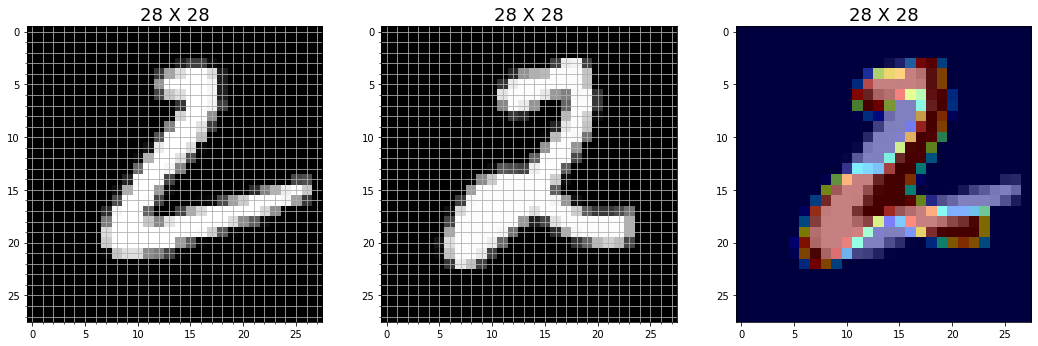

In [3]:
#@title Adivina el dígito
digit = "2" #@param ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
index = y[y == int(digit)].sample(n=2).index
fig,axs = plt.subplots(1,3,figsize=(18,10))

rev = []
for i,ax in enumerate(axs):
  if i==2:
    ax.set_title("28 X 28",fontsize=18)
    ax.imshow(rev[0],cmap='gray')
    ax.imshow(rev[1],cmap='jet', alpha=0.5)
    
    continue
  ax.set_title("28 X 28",fontsize=18)
  rev += [X.iloc[index[i]].values.reshape(28,28)]
  ax.imshow(rev[i],cmap='gray')

  major_ticks = np.arange(0, 28, 5)
  minor_ticks = np.arange(0, 28, 1)

  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  ax.grid(which='both')




<div align="center">  
<img alt="Colaboratory logo" height="300px" src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/neutral-network-diagram.svg" align="center" hspace="10px" vspace="0px">

<img alt="Colaboratory logo" height="300px" src="https://ml4a.github.io/images/figures/mnist_1layer.png" align="right" hspace="10px" vspace="10px">

</div>  

# Perceptrón

  
A finales de los años 50's fue diseñado por Frank Rosenblant el perceptrón, inspirandose en los trabajos de McCulloh y Pitts, y es considerada la arquitectura mas simple en Deep Learning. Básicamente es un modelo de clasificacion lineal, donde usa como función de activación la función de heaviside:

 $heaviside(x)=\begin{cases} 
      0 & x < 0 \\
      1 & x\geq 0 
   \end{cases} $




In [4]:
np.heaviside([-1.5, 0, 2.0], 0.5)

array([0. , 0.5, 1. ])

## ¿Regresión lineal?
El perceptrón es considerado un algoritmo supervisado, cuyos pesos son los $w_{i}$ y el termino $b$ (bias). 

<div style="text-align: center;">
    <img src="https://i.imgur.com/KO0L4tk.png" />
</div>


Es decir, cada entrada es multiplicada por un peso(el cual normalmente se inicia de forma aleatoria) y los resultados son sumados junto al b.Donde $b$ es la ordenada al origen (bias). 

<div align="center">
 <img src="https://ml4a.github.io/images/figures/weights_analogy_2.png"  />
 </div>

In [5]:
input_layer = 28 * 28
sec_layer = 1
w_l = 28 * 28 
b_l = sec_layer

print("Necesitamos saber:", sec_layer*w_l + b_l)

Necesitamos saber: 785


## Pero no funciona siempre :(

El perceptrón perdió credibilidad por un tiempo pues, si bien podía predecir algunas compuerta lógicas, no era el caso con la  **XOR**.

<p><img alt="Colaboratory logo" height="200px" src="https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Logic-Gates.png" align="center" hspace="10px" vspace="0px"></p>

<div style="text-align: center;">
    <img src="https://miro.medium.com/max/299/0*9QQhdtqhL6H2yMJ4.gif" height="200px"/>
    <img src="https://miro.medium.com/max/301/0*Ul09ZJh9XpWoE3dQ.gif" height="200px"/>
    <img src="https://miro.medium.com/max/299/0*W2evx8WUDNHOFeoA.gif" height="200px"/>
</div> 

Como se puede ver en el caso de **AND** y **OR** podemos trazar una linea que me permita obtener una clasificación correcta, cosa que no pasa con la **XOR**.

## ¿Y si tenemos más neuronas, más capas?


<div align="center">  
<img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/318WfrZ.png" align="center" hspace="10px" vspace="0px">

</div>  



In [6]:
input_layer = 28 * 28
sec_layer = 16
w_l = input_layer * sec_layer 
b_l = sec_layer

print("Necesitamos saber:", w_l + b_l)

Necesitamos saber: 12560


In [7]:
thr_layer = 16
w_l = sec_layer * thr_layer  
b_l = thr_layer

print("Necesitamos saber:", w_l + b_l)

Necesitamos saber: 272



<div align="center">  
<img alt="Colaboratory logo" height="600px" src="https://i.imgur.com/uoUu9sE.png" align="center" hspace="10px" vspace="0px">

</div>  


In [8]:
from tensorflow import keras

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_shape=(28*28,)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


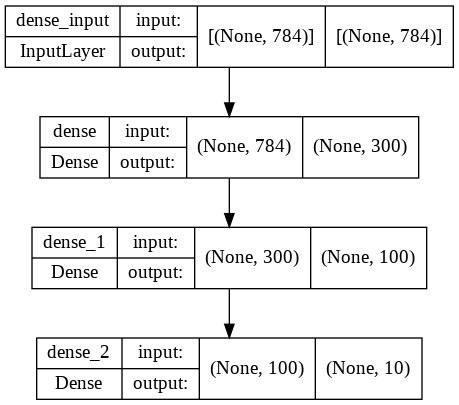

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

# ¿Entonces cómo se cuales son los pesos y bias correctos?

Existe una técnica de optimización para las funciones de perdida (o de comparación) que es central en el desarrollo de modelos de machine learnig, en especial para el deep learning.

A ésta técnica se le llama gradiente de descenso ya que se utilizan los gradientes de la función de costo para encontrar la dirección de descenso de la perdida y así actualizar los pesos del modelo de tal forma que el costo llegue a un mínimo (local).

Supongamos que tenemos un modelo lineal 

$$\hat{y} = \sum_i w_i x_i$$ 

cuya función de costo será la función de diferencias cuadradas (método de mínimos cuadrados) 

$$\frac{1}{2n}\sum_i (y_i-\hat{y_i})^2$$

Debemos derivar **respecto a los pesos** la función de coste, y así, iteración tras iteración mejorar nuestro modelo. Al deribar respecto a cada $w_j$ tendríamos:

$$\frac{1}{n}\sum_i (y_i-\sum_j w_j x_j)x_j $$

Esa sería ésta la función que nos permitirá hacer la optimización del modelo. Una forma de verlo rápidamente:

<img height="300px" src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0402.png" alt="Drawing" style="width: 200px;"/>

En general si tenemos una función de perdida $C(w)$ el gradiente de descenso nos dice que debemos actualizarla en cada iteración como:

$$C(w)- \alpha \nabla_w
C(w)$$

Donde $\alpha$ se el hiperparámetro que controla la velocidad de aprendizaje (learning rate) y $\nabla$ es el operador de derivadas parciales.


In [12]:

from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="https://thumbs.gfycat.com/BitesizedWeeBlacklemur-mobile.mp4" type="video/mp4">
    </video>
""")

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=["accuracy"])

In [14]:
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

y_categorical = to_categorical(y)
es=EarlyStopping(monitor='val_loss',patience=2)

In [15]:
history =  model.fit(X, y_categorical, epochs=20, validation_split=0.3,callbacks=[es])

Epoch 1/20
438/438 [==============================] - 6s 10ms/step - loss: 7.4356 - accuracy: 0.7334 - val_loss: 1.1019 - val_accuracy: 0.6995
Epoch 2/20
438/438 [==============================] - 4s 9ms/step - loss: 0.9669 - accuracy: 0.7682 - val_loss: 1.0078 - val_accuracy: 0.7133
Epoch 3/20
438/438 [==============================] - 4s 8ms/step - loss: 0.8135 - accuracy: 0.7789 - val_loss: 0.9025 - val_accuracy: 0.7763
Epoch 4/20
438/438 [==============================] - 4s 9ms/step - loss: 0.7426 - accuracy: 0.8088 - val_loss: 1.0595 - val_accuracy: 0.8060
Epoch 5/20
438/438 [==============================] - 4s 8ms/step - loss: 0.7530 - accuracy: 0.8125 - val_loss: 0.9006 - val_accuracy: 0.7740
Epoch 6/20
438/438 [==============================] - 4s 9ms/step - loss: 0.7130 - accuracy: 0.8269 - val_loss: 0.9779 - val_accuracy: 0.7908
Epoch 7/20
438/438 [==============================] - 4s 10ms/step - loss: 0.6735 - accuracy: 0.8180 - val_loss: 0.9360 - val_accuracy: 0.7527


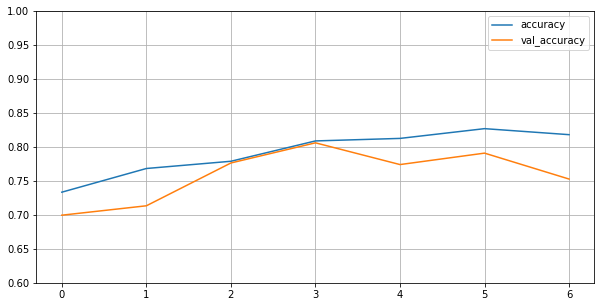

In [16]:
information = pd.DataFrame(history.history)
information[['accuracy','val_accuracy']].plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0.6, 1)
plt.show()

In [17]:
mnist = pd.read_csv("/content/sample_data/mnist_test.csv", names =['digit']+list(range(28*28)))
ytest = mnist.loc[:,'digit']
Xtest = mnist.drop(columns='digit',axis=1)

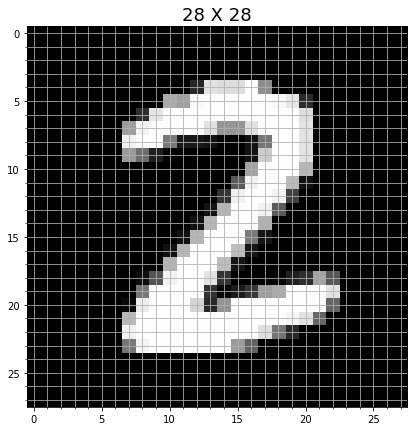

In [18]:
#@title Adivina el dígito de nuevo
digit = "2" #@param ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
index = ytest[ytest == int(digit)].sample(n=1).index
fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.set_title("28 X 28",fontsize=18)
ax.imshow(Xtest.iloc[index].values.reshape(28,28),cmap='gray')
major_ticks = np.arange(0, 28, 5)
minor_ticks = np.arange(0, 28, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')

In [19]:
print("El index en test es",index)
print("Y el modelo dice \n\n",model.predict(Xtest.loc[index]))
y_pred = np.argmax(model.predict(Xtest.loc[index]), axis=-1) 
print("\n\nEl modelo dice que es un", y_pred)

El index en test es Int64Index([5541], dtype='int64')
Y el modelo dice 

 [[5.30428040e-15 2.14757100e-02 1.72274172e-01 7.50996590e-01
  6.29778239e-13 3.48370150e-02 8.03531664e-16 4.59706690e-03
  1.27516575e-02 3.06785828e-03]]


El modelo dice que es un [3]


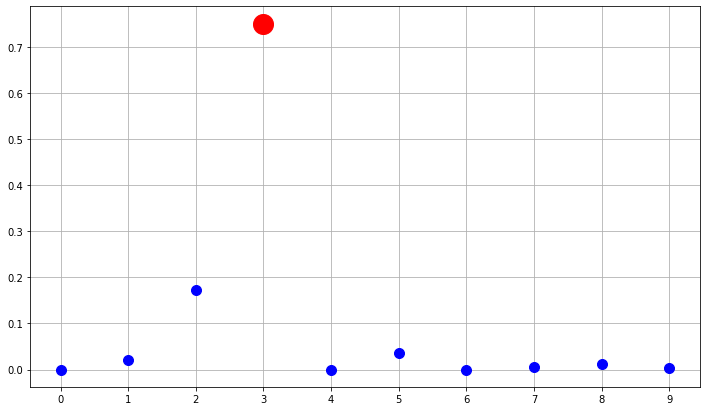

In [20]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
fig, ax = plt.subplots(figsize=(12,7))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.plot(range(0,10),model.predict(Xtest.loc[index])[0],"bo ",ms=10)
ax.plot(y_pred[0],model.predict(Xtest.loc[index])[0,y_pred[0]],"ro ",ms=20)
ax.grid()
plt.show()

In [21]:
model.evaluate(Xtest,to_categorical(ytest))

313/313 [==============================] - 1s 3ms/step - loss: 0.9680 - accuracy: 0.7558


[0.9679746031761169, 0.7558000087738037]

# ¿HEY QUIERES SABER MÁS? PULSA [AQUÍ](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

# ¿Y la convolución?


Las redes neuronales convolucionales (CNN) surgieron del estudio de la corteza visual del cerebro, y se han utilizado en el reconocimiento de imágenes desde la década de 1980. En los últimos años, gracias al aumento en el poder computacional, la cantidad de datos de entrenamiento disponibles y los trucos presentados en la clase anteriro para entrenar redes profundas, las CNN han logrado alcanzar un rendimiento sobrehumano en algunas tareas visuales complejas. Impulsan servicios de búsqueda de imágenes, autos que se manejan solos, sistemas automáticos de clasificación de video y más. Además, las CNN no se limitan a la percepción visual: también tienen éxito en muchas otras tareas, como el reconocimiento de voz o el procesamiento del lenguaje natural (PNL).

La diferencia fundamental entre una capa densamente conectada y una capa de convolución (convolutional layer ) es que las capas densas aprenden patrones globales en su espacio de características de entrada (por ejemplo, para un dígito MNIST, patrones que involucran todos los píxeles), mientras que las capas de convolución aprenden patrones locales, en el caso de imágenes, patrones encontrados en pequeñas ventanas de las caracteristicas de entrada. 

![](https://i.stack.imgur.com/bRN2c.jpg)

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/qdvojdR.png" align="center" hspace="10px" vspace="0px"></p> 

Esta característica clave otorga a las capas convolucionales dos propiedades interesantes:
* Los patrones que aprenden son invariantes de translacion. Después de aprender un cierto patrón en la esquina inferior derecha de una imagen, una CNN puede reconocerlo en cualquier lugar, por ejemplo, en la esquina superior izquierda. Una red densamente conectada tendría que aprender el patrón nuevamente si apareciera en una nueva ubicación. Esto hace que los datos de las CNN sean eficientes cuando se procesan imágenes (porque el mundo visual es fundamentalmente invariante ante translacion).

* Pueden aprender jerarquías espaciales de patrones: una primera capa de convolución aprenderá pequeños patrones locales como los bordes, una segunda capa de convolución aprenderá patrones más grandes hechos de las características de las primeras capas, y así sucesivamente. Esto permite que las CNN aprendan eficientemente conceptos visuales cada vez más complejos y abstractos (porque el mundo visual es fundamentalmente jerárquico espacialmente).

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/FaeuJas.png" align="center" hspace="10px" vspace="0px"></p> 



In [22]:
#@title Hagamos un match
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Primero configure la figura, el eje y el elemento de la trama que queremos animar
fig, ax = plt.subplots(figsize=(13,8) )
plt.close()

y1 = np.array([0.1,0.2,-0.1,4.1,-2,1.5,-0.1])
x1=np.arange(1,len(y1)+1)
ax.plot(x1,y1+7,'o-')

ax.set_xlim(( -7, 15))
ax.set_ylim((-3, 12))
ax.set_yticks([])
ax.set_xticks([])
line, = ax.plot([], [], 'o-r')

# función de inicialización: traza el fondo de cada cuadro
def init():
    line.set_data([], [])
    return (line,)

# función de animación
def animate(i):
  i=i-6
  y2 = np.array([0.1,4,-2.2,1.6,0.1,0.1,0.2])
  x=np.arange(1,len(y2)+1)+i
  line.set_data(x, y2)
  ax.set_title('cross correlation=%.3f' %(np.correlate(y1,y2,mode='full'))[6+i], fontsize=20)
  for t in ax.texts:
    t.set_visible(False)

  for i in range(len(x)):
    ax.text(x1[i], y1[i]+7, str(y1[i]))
    ax.text(x[i], y2[i], str(y2[i]))

    
  return (line,)

  anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=7+6, interval=2000, blit=True)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=7+6, interval=2000, blit=True)
rc('animation', html='jshtml')
anim

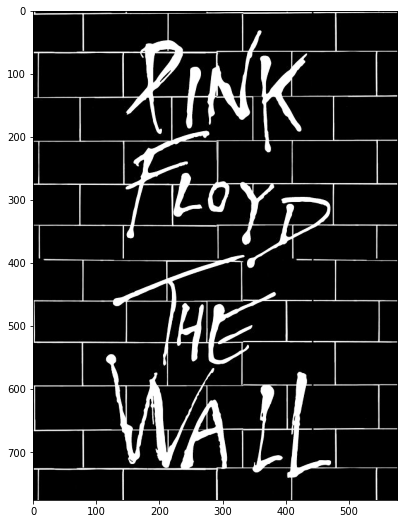

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.signal import convolve2d

image= mpimg.imread('https://i.imgur.com/R2mS8Oh.png')
fig,ax=plt.subplots(1,1,figsize=(12,9))
ax.imshow(image,cmap='Greys')
plt.show()

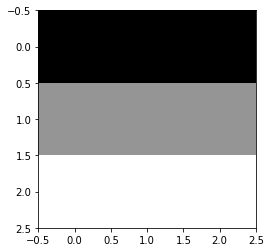

In [24]:
K=np.array([[1,1,1],
           [0,0,0],
           [-1,-1,-1]])
plt.imshow(K,cmap='Greys')
plt.show()

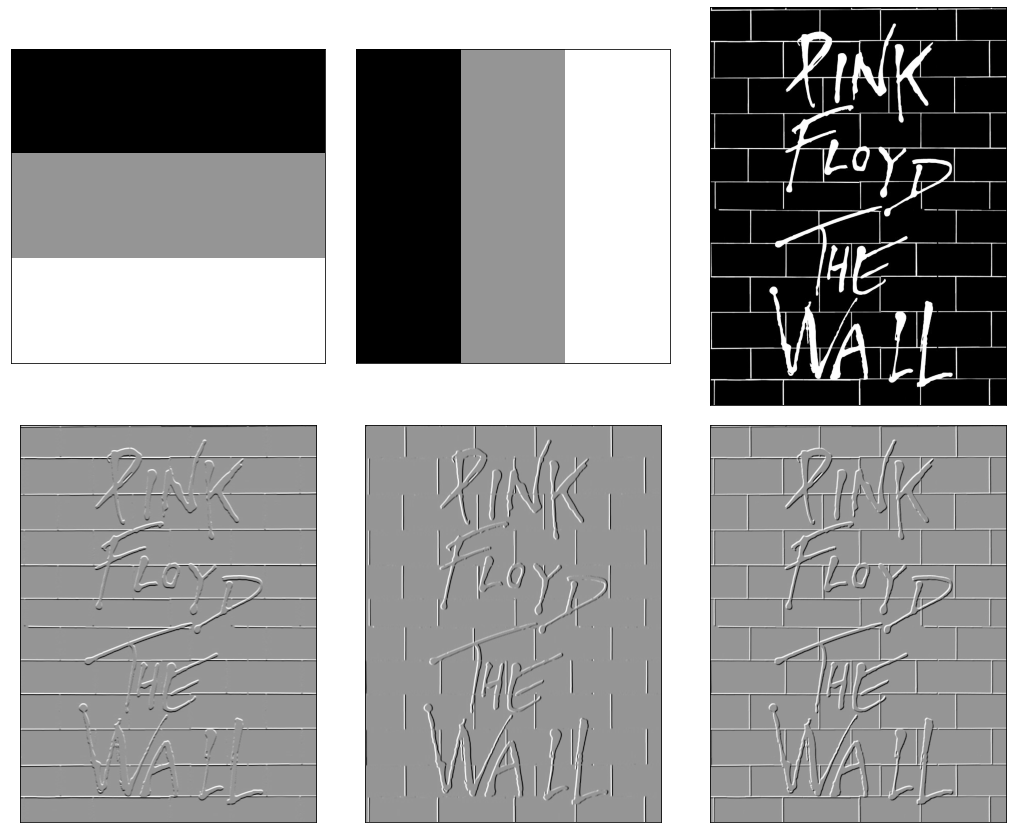

In [25]:
fig , ax = plt.subplots(2,3, figsize=(18,15), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.05, wspace=0.1))
ax[0,2].imshow(image, cmap='Greys' )
ax[0,0].imshow(K,cmap='Greys')
ax[0,1].imshow(K.T,cmap='Greys')
ax[1,2].imshow(convolve2d(image,K.T, mode='valid')+convolve2d(image,K, mode='valid'), cmap='Greys')
ax[1,0].imshow(convolve2d(image,K, mode='valid'), cmap='Greys')
ax[1,1].imshow(convolve2d(image,K.T, mode='valid'), cmap='Greys')
plt.show()

Hasta ahora, por simplicidad, hemos representado la salida de cada capa convolucional como una delgada capa 2D, pero en realidad una capa convolucional tiene múltiples Kernels (filtros), y genera un mapa de características por filtro, por lo que es representado con mayor precisión en 3D.

Además, las imágenes de entrada también se componen de múltiples subcapas: una por canal de color. Normalmente hay tres: rojo, verde y azul (RGB). Las imágenes en escala de grises tienen solo un canal, pero algunas imágenes pueden tener mucho más, por ejemplo, imágenes satelitales que capturan frecuencias de luz adicionales (como infrarrojo).
<p><img alt="Colaboratory logo" height="400px" src="https://i.imgur.com/OuDTED7.png" align="center" hspace="10px" vspace="0px"></p>




La arquitectura tipica de las CNN es como se muestra en la figura de abajo 

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/BqlLRkJ.png" align="center" hspace="10px" vspace="0px"></p>


In [26]:
from tensorflow import keras

In [27]:
model2= keras.models.Sequential();
model2.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)));
model2.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu"));
model2.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)));
model2.add(keras.layers.Flatten());
model2.add(keras.layers.Dense(100, activation="relu"));
model2.add(keras.layers.Dense(10, activation="softmax"));

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               460900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                      

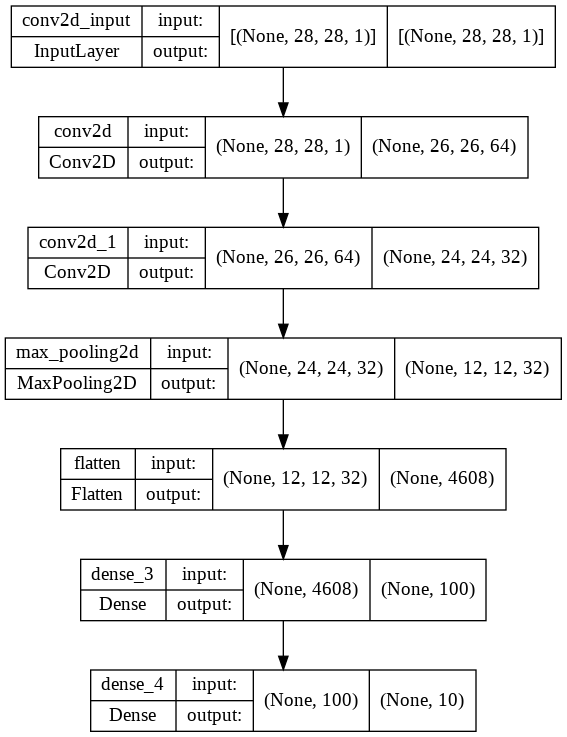

In [29]:
plot_model(model2,show_shapes=True, show_layer_names=True)

In [30]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=["accuracy"])

In [31]:
#B,H,W,CH -> FORMATO 1 (Tensorflow) Channel last
#B,CH,H,W -> FORMATO 2 (MxNet) Channel first
X_train=X.values.reshape(20000,28,28,1) 

In [32]:
history2 =  model2.fit(X_train, y_categorical, epochs=20, validation_split=0.3)

Epoch 1/20
438/438 [==============================] - 7s 11ms/step - loss: 0.4282 - accuracy: 0.9154 - val_loss: 0.1123 - val_accuracy: 0.9663
Epoch 2/20
438/438 [==============================] - 4s 10ms/step - loss: 0.0858 - accuracy: 0.9741 - val_loss: 0.1184 - val_accuracy: 0.9662
Epoch 3/20
438/438 [==============================] - 4s 10ms/step - loss: 0.0534 - accuracy: 0.9823 - val_loss: 0.1167 - val_accuracy: 0.9697
Epoch 4/20
438/438 [==============================] - 4s 10ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.1197 - val_accuracy: 0.9747
Epoch 5/20
438/438 [==============================] - 4s 10ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.1243 - val_accuracy: 0.9722
Epoch 6/20
438/438 [==============================] - 5s 11ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.1065 - val_accuracy: 0.9773
Epoch 7/20
438/438 [==============================] - 5s 11ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.1650 - val_accuracy: 0.9718

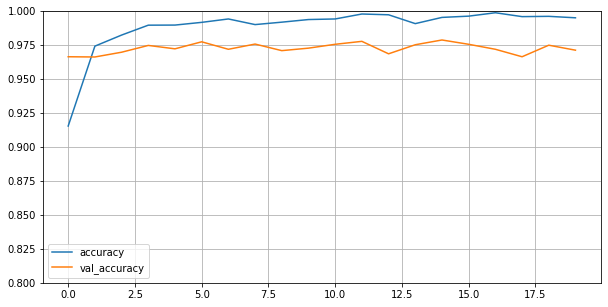

In [33]:
information = pd.DataFrame(history2.history)
information[['accuracy','val_accuracy']].plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0.8, 1)
plt.show()

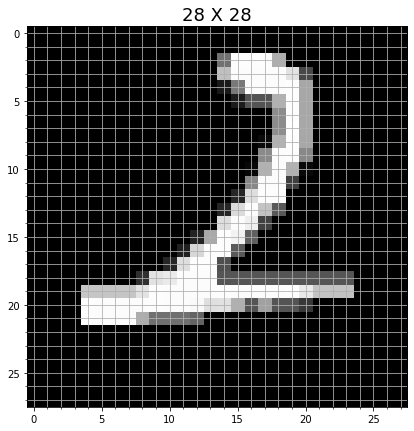

In [34]:
#@title Adivina el dígito de nuevo
digit = "2" #@param ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
index = ytest[ytest == int(digit)].sample(n=1).index
fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.set_title("28 X 28",fontsize=18)
ax.imshow(Xtest.iloc[index].values.reshape(28,28),cmap='gray')
major_ticks = np.arange(0, 28, 5)
minor_ticks = np.arange(0, 28, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')

In [35]:
print("El index en test es",index)
print("Y el modelo dice \n\n",model2.predict(Xtest.loc[index].values.reshape(1,28,28,1)))
y_pred = np.argmax(model.predict(Xtest.loc[index]), axis=-1) 
print("\n\nEl modelo dice que es un", y_pred)

El index en test es Int64Index([4387], dtype='int64')
Y el modelo dice 

 [[5.1506004e-09 1.2244714e-10 9.9999964e-01 2.9484944e-15 1.4174292e-10
  1.7372319e-12 3.3780816e-07 4.2995125e-11 3.0720337e-17 7.2411977e-13]]


El modelo dice que es un [6]


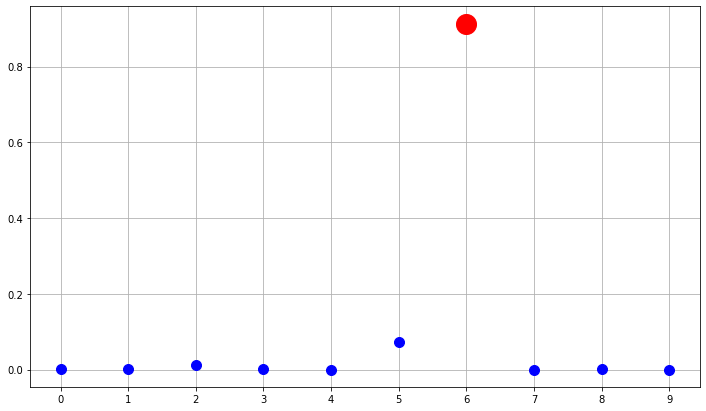

In [36]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
fig, ax = plt.subplots(figsize=(12,7))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.plot(range(0,10),model.predict(Xtest.loc[index])[0],"bo ",ms=10)
ax.plot(y_pred[0],model.predict(Xtest.loc[index])[0,y_pred[0]],"ro ",ms=20)
ax.grid()
plt.show()

In [37]:
model2.evaluate(Xtest.values.reshape(10000,28,28,1),to_categorical(ytest))

313/313 [==============================] - 2s 5ms/step - loss: 0.2256 - accuracy: 0.9731


[0.22558808326721191, 0.9731000065803528]

# ¿Bueno y los colores qué?

In [38]:
(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()

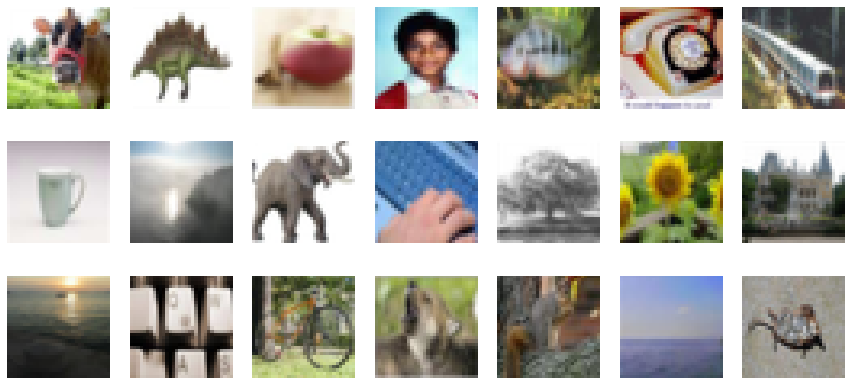

In [39]:
fig , ax = plt.subplots(3,7, figsize=(15,7))
for i, ax in enumerate(ax.flat):
  ax.imshow(train_image[i], cmap='Greys')
  ax.axis('off')

In [40]:
model_color = keras.models.Sequential([
      keras.layers.Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal' , padding='same',strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.3),

      keras.layers.Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.3),

      keras.layers.Conv2D(128, kernel_size=3, activation='relu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(128, kernel_size=3, activation='relu', kernel_initializer='he_normal',  padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.4),

      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),

      keras.layers.Dropout(0.5),

      keras.layers.Dense(100, activation='softmax')
])

In [41]:
model_color.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

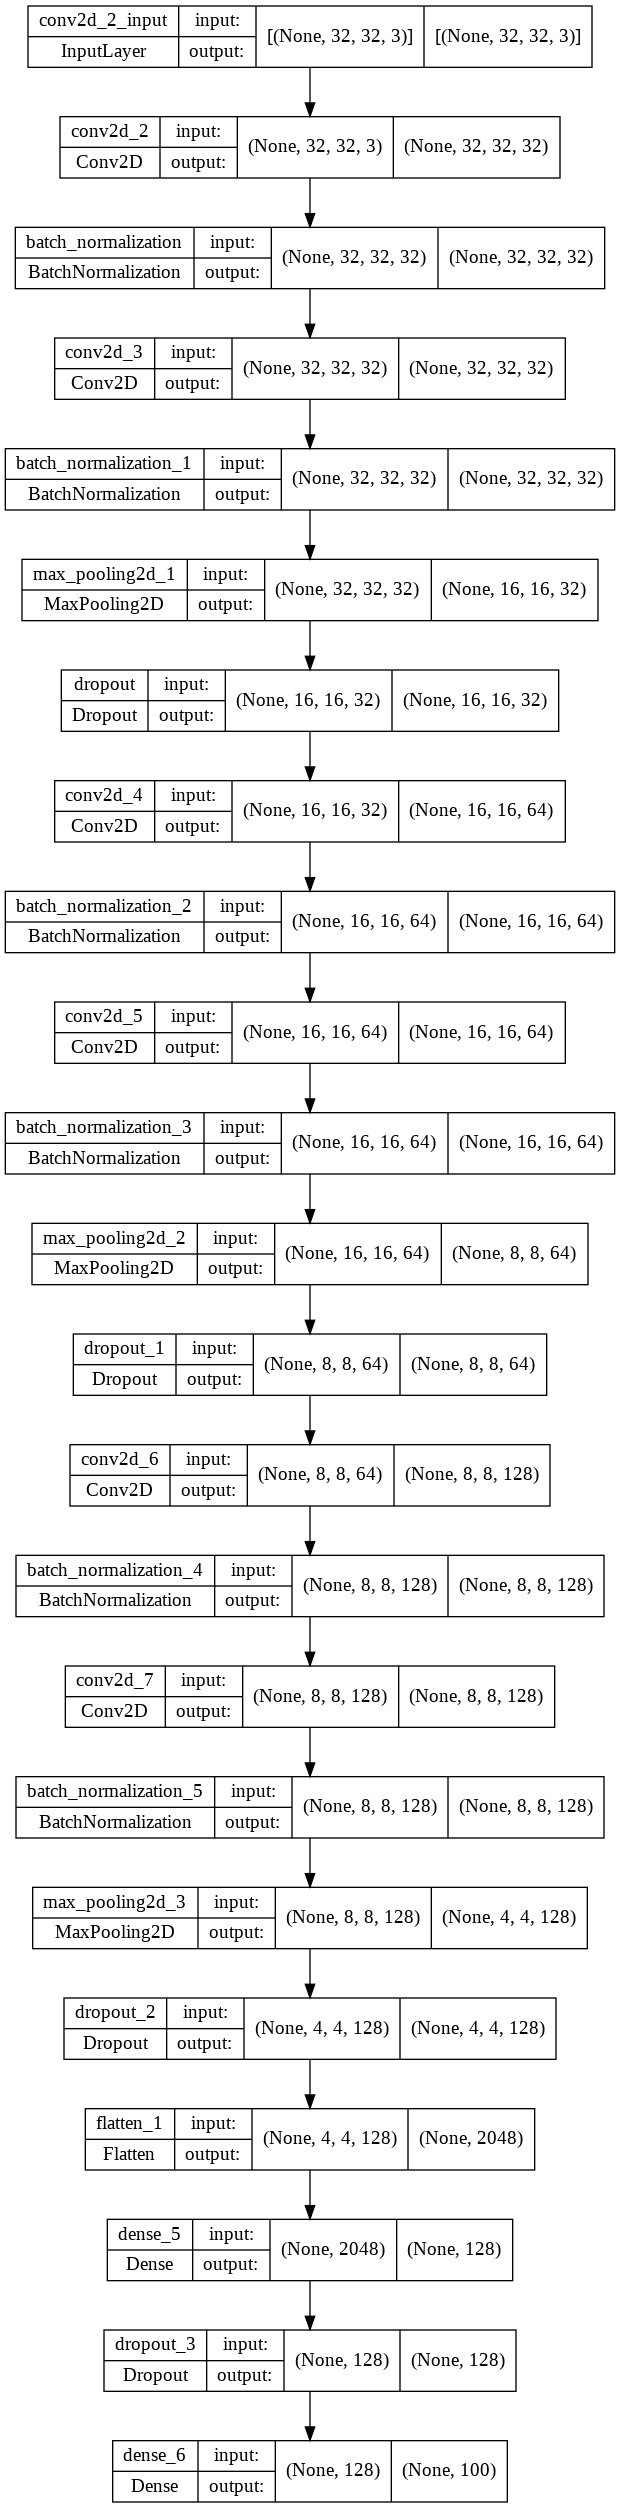

In [42]:
plot_model(model_color,show_shapes=True, show_layer_names=True)

In [43]:
train_image = train_image / 255.0
test_image = test_image / 255.0
#model_color.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
#history_color = model_color.fit(train_image, train_label, epochs=50, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])
#model_color.evaluate(test_image, test_label, verbose=0)

# Bueno y la cosa se vuelve más compleja

In [44]:
from keras.preprocessing import image

model_complex_vgg = keras.applications.vgg16.VGG16(weights='imagenet') 
model_complex_vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
model_complex_resnet = keras.applications.resnet50.ResNet50(weights='imagenet')
model_complex_resnet.summary() 

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [46]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

--2022-04-06 21:10:44--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168370 (164K) [image/jpeg]
Saving to: ‘indian_elephant.jpg’

indian_elephant.jpg 100%[===================>] 164.42K  --.-KB/s    in 0.1s    

2022-04-06 21:10:44 (1.30 MB/s) - ‘indian_elephant.jpg’ saved [168370/168370]

--2022-04-06 21:10:45--  https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ssanchezgoe/diplomado_udea/raw/master/image/african_elephant_bull.jpg [following]
--2022-04-06 21:10:45--  htt

Tamaño de la imagen: (600, 800, 3)


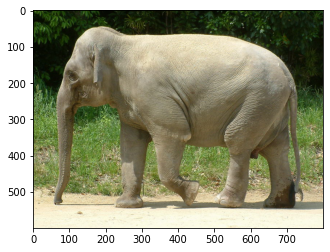

In [47]:
# Choose the elephant to be classified
img_path = 'indian_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [48]:
x_vgg = keras.applications.vgg16.preprocess_input(x)
preds = model_complex_vgg.predict(x_vgg)
print("Prediction", keras.applications.vgg16.decode_predictions(preds, top=5)[0])

Prediction [('n02504013', 'Indian_elephant', 0.71757245), ('n02504458', 'African_elephant', 0.2431454), ('n01871265', 'tusker', 0.036462057), ('n02437312', 'Arabian_camel', 0.0009113553), ('n01704323', 'triceratops', 0.00051373756)]


In [49]:
x_resnet = keras.applications.resnet50.preprocess_input(x)
preds = model_complex_vgg.predict(x_resnet)
print('Predicted:', keras.applications.resnet50.decode_predictions(preds, top=5)[0])

Predicted: [('n02504013', 'Indian_elephant', 0.81756777), ('n01871265', 'tusker', 0.1269269), ('n02504458', 'African_elephant', 0.05539888), ('n01704323', 'triceratops', 8.579809e-05), ('n02437312', 'Arabian_camel', 9.346969e-06)]


Tamaño de la imagen: (664, 1000, 3)


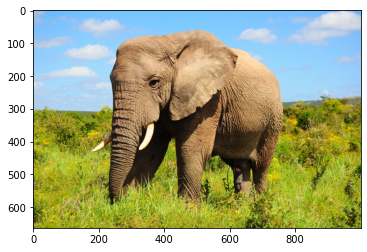

In [50]:
# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [51]:
x_vgg = keras.applications.vgg16.preprocess_input(x)
preds = model_complex_vgg.predict(x_vgg)
print("Prediction", keras.applications.vgg16.decode_predictions(preds, top=5)[0])

Prediction [('n02504458', 'African_elephant', 0.75513124), ('n01871265', 'tusker', 0.2037823), ('n02504013', 'Indian_elephant', 0.04108568), ('n01704323', 'triceratops', 7.2856653e-07), ('n02437312', 'Arabian_camel', 6.863548e-08)]


In [52]:
x_resnet = keras.applications.resnet50.preprocess_input(x)
preds = model_complex_vgg.predict(x_resnet)
print('Predicted:', keras.applications.resnet50.decode_predictions(preds, top=5)[0])

Predicted: [('n02504458', 'African_elephant', 0.82885313), ('n01871265', 'tusker', 0.14984843), ('n02504013', 'Indian_elephant', 0.021298395), ('n01704323', 'triceratops', 1.0527101e-08), ('n02437312', 'Arabian_camel', 5.002271e-10)]


# ¿Y toca todo de 0?

Veamos por ejemplo en las siguientes imagenes los filtros y las partes de las imágenes qué más activan dichos filtros:
![alt text](https://miro.medium.com/max/907/1*jPCEik198_CjtmSL2H6o4g.png)
![alt text](https://miro.medium.com/max/818/1*1Y6HZxK-lOmqB8KnizTCow.png)

Note como en las primeras capas el modelo reconoce lineas simples y colores, y en las últimas  los filtros se han complejizado suficiente como para activar rostros completos.

In [53]:
from keras.datasets import cifar100
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16

In [54]:
(train_image, train_label) , (test_image, test_label) = cifar100.load_data(label_mode='fine')

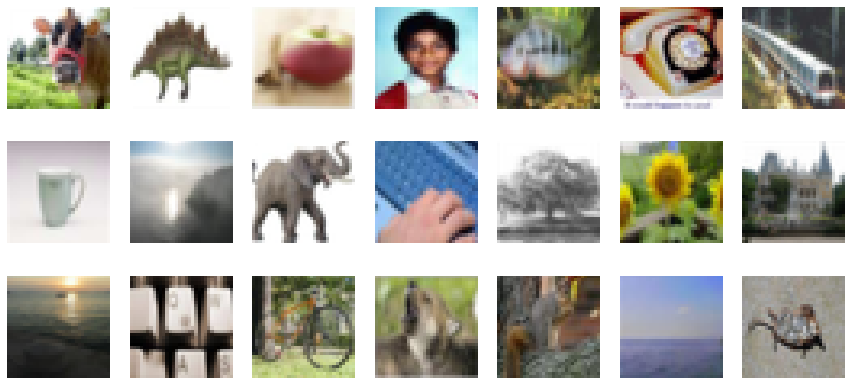

In [55]:
fig , ax = plt.subplots(3,7, figsize=(15,7))
for i, ax in enumerate(ax.flat):
  ax.imshow(train_image[i], cmap='Greys')
  ax.axis('off')

In [56]:
conv_base = VGG16(include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fd22ec24fd0> False
<keras.layers.convolutional.Conv2D object at 0x7fd22ed23250> False
<keras.layers.convolutional.Conv2D object at 0x7fd22ebd2d10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd335901710> False
<keras.layers.convolutional.Conv2D object at 0x7fd22ec296d0> False
<keras.layers.convolutional.Conv2D object at 0x7fd22ebe3b50> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd22ebeb650> False
<keras.layers.convolutional.Conv2D object at 0x7fd22eb75a10> False
<keras.layers.convolutional.Conv2D object at 0x7fd22ebf1390> False
<keras.layers.convolutional.Conv2D object at 0x7fd22eb7ab10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd22eb83150> False
<keras.layers.convolutional.Conv2D object at 0x7fd22eb7fd50> False
<keras.layers.convolutional.Conv2D object at 0x7fd22ebe9d90> False
<keras.layers.convolutional.Conv2D object at 0x7fd22eb8c110> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd22eb94310>

In [57]:
new_vgg16 =  keras.models.Sequential()
new_vgg16.add(conv_base)
new_vgg16.add(keras.layers.Flatten())
new_vgg16.add(keras.layers.BatchNormalization())
new_vgg16.add(keras.layers.Dense(512, activation='relu'))
new_vgg16.add(keras.layers.BatchNormalization())
new_vgg16.add(keras.layers.Dropout(0.5))
new_vgg16.add(keras.layers.Dense(256, activation='relu'))
new_vgg16.add(keras.layers.BatchNormalization())
new_vgg16.add(keras.layers.Dropout(0.5))
new_vgg16.add(keras.layers.Dense(100, activation='softmax'))

In [58]:
new_vgg16.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
new_vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 512)              

In [59]:
x_train=preprocess_input(train_image)
y_train = train_label.copy()
x_test=preprocess_input(test_image)
y_test = test_label.copy()

In [60]:
new_vgg16.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 36ms/step - loss: 3.8673 - accuracy: 0.1000 - val_loss: 14.2029 - val_accuracy: 0.1308
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.9794 - accuracy: 0.2106 - val_loss: 4.8349 - val_accuracy: 0.2261
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.6873 - accuracy: 0.2814 - val_loss: 4.7334 - val_accuracy: 0.1810
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3888 - accuracy: 0.3519 - val_loss: 3.9265 - val_accuracy: 0.3631
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.2100 - accuracy: 0.3936 - val_loss: 2.3797 - val_accuracy: 0.4034
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.0112 - accuracy: 0.4438 - val_loss: 2.3316 - val_accuracy: 0.4505
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8461 - accuracy: 0.4860 - val_loss: 2.1535 

In [61]:
labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

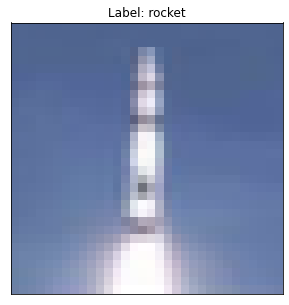

In [64]:
i=105
select = x_test[i:i+1]
pred = new_vgg16.predict(x_test[i:i+1]).argmax()
fig = plt.figure(figsize=(15,5))
plt.tight_layout()
plt.imshow(test_image[i],cmap='gray')
plt.title(f'Label: {labels[pred]}')
plt.xticks([])
plt.yticks([])
plt.show()